In [1]:
from google.colab import files
uploaded = files.upload()

Saving combined.csv to combined.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score ,confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor
from sklearn.decomposition import PCA 

dataset = pd.read_csv('combined.csv')

dataset.describe()

,PR,RP,RR,TP,PT,QT,RT,ST,TR,QRS,Systol,Diastole,High
count,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000
mean,138.602573,633.027162,771.198475,370.696926,539.183941,400.581368,269.911842,270.344294,598.556112,130.237074,128.043068,76.655340,0.274005
std,35.460880,78.646803,68.183193,70.903691,38.058265,20.289097,17.572103,22.023683,66.379447,15.674233,19.677199,18.932144,0.446025
min,80.000000,320.000000,500.000000,60.000000,300.000000,180.000000,100.000000,100.000000,260.000000,80.000000,-9.618831,-237.741334,0.000000
25%,120.000000,600.000000,720.000000,340.000000,520.000000,400.000000,260.000000,260.000000,560.000000,120.000000,115.014913,68.285480,0.000000
50%,140.000000,640.000000,760.000000,380.000000,540.000000,400.000000,280.000000,280.000000,600.000000,140.000000,124.666629,72.050801,0.000000
75%,140.000000,680.000000,800.000000,400.000000,540.000000,420.000000,280.000000,280.000000,620.000000,140.000000,142.663858,77.213729,1.000000
max,340.000000,1020.000000,1140.000000,760.000000,760.000000,560.000000,340.000000,420.000000,1000.000000,260.000000,408.520390,407.871350,1.000000


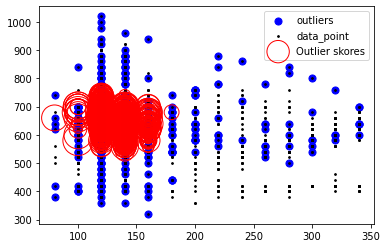

In [4]:
x = dataset[['PR','RP','RR','TP','PT','QT','RT','ST','TR','QRS']]
y = dataset.High
columns = x.columns.tolist() 
clf = LocalOutlierFactor() 
y_pred = clf.fit_predict(x)
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score['score'] = x_score

threshold_outliers = -1.5
filtre = outlier_score['score'] < threshold_outliers
outlier_index = outlier_score[filtre].index.tolist()
plt.figure()
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1],color = 'blue',s=50,label='outliers')
plt.scatter(x.iloc[:,0]
            ,x.iloc[:,1],color='k',s=3,label='data_point') 

radius = (x_score.max() - x_score ) / (x_score.max() - x_score.min() ) 
outlier_score['radius '] = radius

plt.scatter(x.iloc[:,0], x.iloc[:,1], s=1000*radius, edgecolors='r',facecolor='none',label='Outlier skores')
plt.legend()
plt.show();

In [5]:
x = x.drop(outlier_index) #outliers remove
y = y.drop(outlier_index).values

print(len(y))

14136


In [8]:
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=42)

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    clf_report.to_csv("report_training.csv")
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    clf_report.to_csv("report_testing.csv")
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [55]:
def classification_report_csv(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split('      ')
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.to_csv('classification_report.csv', index = False)

In [56]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

LR.fit(X_train,y_train)

evaluate(LR, X_train, X_test, y_train, y_test)


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[7280  756]
 [1664 1608]]
ACCURACY SCORE:
0.7860
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.813953     0.680203  0.785992      0.747078      0.775252
recall        0.905923     0.491443  0.785992      0.698683      0.785992
f1-score      0.857479     0.570617  0.785992      0.714048      0.774475
support    8036.000000  3272.000000  0.785992  11308.000000  11308.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1884  199]
 [ 374  371]]
ACCURACY SCORE:
0.7974
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.834367    0.650877  0.797383     0.742622      0.786029
recall        0.904465    0.497987  0.797383     0.701226      0.797383
f1-score      0.868003    0.564259  0.797383     0.716131      0.787985
support    2083.000000  745.000000  0.797383  2828.000000   2828.000000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [57]:
scores = {
    'Logistic Regression': {
        'Train': accuracy_score(y_train,LR.predict(X_train)),
        'Test': accuracy_score(y_test,LR.predict(X_test)),
    },
}

Feature: 0, Score: -0.00364
Feature: 1, Score: 0.04796
Feature: 2, Score: 0.05770
Feature: 3, Score: -0.04205
Feature: 4, Score: -0.00766
Feature: 5, Score: -0.00401
Feature: 6, Score: -0.06854
Feature: 7, Score: 0.01006
Feature: 8, Score: -0.06138
Feature: 9, Score: -0.01408


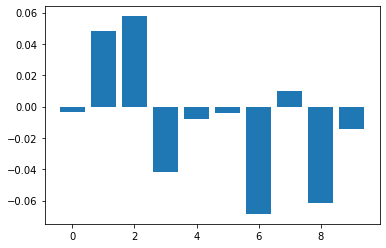

In [58]:
importance = LR.coef_[0]
from matplotlib import pyplot
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [59]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train) #Calculation 

evaluate(knn, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[7741  295]
 [ 368 2904]]
ACCURACY SCORE:
0.9414
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.954618     0.907784  0.941369      0.931201      0.941067
recall        0.963290     0.887531  0.941369      0.925410      0.941369
f1-score      0.958935     0.897543  0.941369      0.928239      0.941171
support    8036.000000  3272.000000  0.941369  11308.000000  11308.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[2002   81]
 [  86  659]]
ACCURACY SCORE:
0.9409
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.958812    0.890541  0.940948     0.924676      0.940827
recall        0.961114    0.884564  0.940948     0.922839      0.940948
f1-score      0.959962    0.887542  0.940948     0.923752      0.940884
support    2083.000000  745.000000  0.940948  2828.000000   2828.000000


In [60]:
scores['KNN'] ={
        'Train': accuracy_score(y_train,knn.predict(X_train)),
        'Test': accuracy_score(y_test,knn.predict(X_test)),
    }

In [61]:
from sklearn.svm import SVC

SVM = SVC(random_state=42)
SVM.fit(X_train,y_train)

evaluate(SVM, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[7489  547]
 [ 925 2347]]
ACCURACY SCORE:
0.8698
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.890064     0.810988  0.869827      0.850526      0.867183
recall        0.931931     0.717298  0.869827      0.824615      0.869827
f1-score      0.910517     0.761271  0.869827      0.835894      0.867332
support    8036.000000  3272.000000  0.869827  11308.000000  11308.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1942  141]
 [ 191  554]]
ACCURACY SCORE:
0.8826
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.910455    0.797122  0.882603     0.853789      0.880599
recall        0.932309    0.743624  0.882603     0.837967      0.882603
f1-score      0.921252    0.769444  0.882603     0.845348      0.881261
support    2083.000000  745.000000  0.882603  2828.000000   2828.000000


In [62]:
scores['SVM'] ={
        'Train': accuracy_score(y_train,SVM.predict(X_train)),
        'Test': accuracy_score(y_test,SVM.predict(X_test)),
    }

In [64]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,y_train) #learning
evaluate(NB, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[5170 2866]
 [ 252 3020]]
ACCURACY SCORE:
0.7243
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.953523     0.513082  0.724266      0.733302      0.826080
recall        0.643355     0.922983  0.724266      0.783169      0.724266
f1-score      0.768316     0.659533  0.724266      0.713924      0.736839
support    8036.000000  3272.000000  0.724266  11308.000000  11308.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1333  750]
 [  58  687]]
ACCURACY SCORE:
0.7143
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.958303    0.478079  0.714286     0.718191      0.831795
recall        0.639942    0.922148  0.714286     0.781045      0.714286
f1-score      0.767415    0.629698  0.714286     0.698556      0.731135
support    2083.000000  745.000000  0.714286  2828.000000   2828.000000


In [65]:
scores['Naive Bayes'] = {
        'Train': accuracy_score(y_train,NB.predict(X_train)),
        'Test': accuracy_score(y_test,NB.predict(X_test)),
    }

In [66]:
#Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train) #learning
evaluate(DTC, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[7761  275]
 [ 165 3107]]
ACCURACY SCORE:
0.9611
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.979182     0.918687  0.961089      0.948935      0.961678
recall        0.965779     0.949572  0.961089      0.957676      0.961089
f1-score      0.972435     0.933874  0.961089      0.953154      0.961277
support    8036.000000  3272.000000  0.961089  11308.000000  11308.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1958  125]
 [  70  675]]
ACCURACY SCORE:
0.9310
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.965483    0.843750  0.931047     0.904617      0.933414
recall        0.939990    0.906040  0.931047     0.923015      0.931047
f1-score      0.952566    0.873786  0.931047     0.913176      0.931813
support    2083.000000  745.000000  0.931047  2828.000000   2828.000000


In [67]:
scores['Decision Tree'] = {
        'Train': accuracy_score(y_train,DTC.predict(X_train)),
        'Test': accuracy_score(y_test,DTC.predict(X_test)),
    }

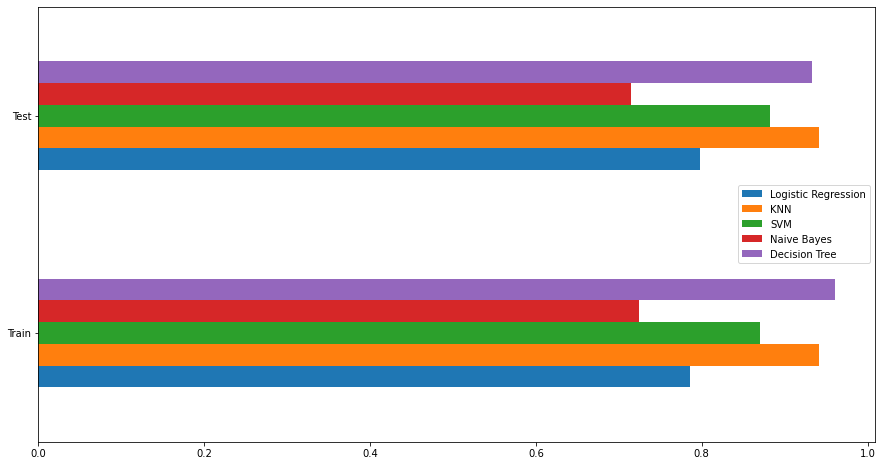

In [21]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[7747  289]
 [ 151 3121]]
ACCURACY SCORE:
0.9611
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.980881     0.915249  0.961089      0.948065      0.961890
recall        0.964037     0.953851  0.961089      0.958944      0.961089
f1-score      0.972386     0.934151  0.961089      0.953269      0.961323
support    8036.000000  3272.000000  0.961089  11308.000000  11308.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1992   91]
 [  70  675]]
ACCURACY SCORE:
0.9431
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.966052    0.881201  0.943069     0.923627      0.943699
recall        0.956313    0.906040  0.943069     0.931177      0.943069
f1-score      0.961158    0.893448  0.943069     0.927303      0.943321
support    2083.000000  745.000000  0.943069  2828.000000   2828.000000


In [23]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[7745  291]
 [ 149 3123]]
ACCURACY SCORE:
0.9611
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.981125     0.914763  0.961089      0.947944      0.961923
recall        0.963788     0.954462  0.961089      0.959125      0.961089
f1-score      0.972379     0.934191  0.961089      0.953285      0.961329
support    8036.000000  3272.000000  0.961089  11308.000000  11308.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[2002   81]
 [  67  678]]
ACCURACY SCORE:
0.9477
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.967617    0.893281  0.947666     0.930449      0.948034
recall        0.961114    0.910067  0.947666     0.935590      0.947666
f1-score      0.964355    0.901596  0.947666     0.932975      0.947822
support    2083.000000  745.000000  0.947666  2828.000000   2828.000000


In [25]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

In [26]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=42)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[7761  275]
 [ 165 3107]]
ACCURACY SCORE:
0.9611
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.979182     0.918687  0.961089      0.948935      0.961678
recall        0.965779     0.949572  0.961089      0.957676      0.961089
f1-score      0.972435     0.933874  0.961089      0.953154      0.961277
support    8036.000000  3272.000000  0.961089  11308.000000  11308.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[2000   83]
 [  72  673]]
ACCURACY SCORE:
0.9452
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.965251    0.890212  0.945191     0.927731      0.945483
recall        0.960154    0.903356  0.945191     0.931755      0.945191
f1-score      0.962696    0.896736  0.945191     0.929716      0.945319
support    2083.000000  745.000000  0.945191  2828.000000   2828.000000


In [27]:
scores['Extra Tree'] = {
        'Train': accuracy_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ex_tree_clf.predict(X_test)),
    }

In [28]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[7362  674]
 [ 650 2622]]
ACCURACY SCORE:
0.8829
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.918872     0.795510  0.882915      0.857191      0.883177
recall        0.916127     0.801345  0.882915      0.858736      0.882915
f1-score      0.917498     0.798417  0.882915      0.857957      0.883041
support    8036.000000  3272.000000  0.882915  11308.000000  11308.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1910  173]
 [ 135  610]]
ACCURACY SCORE:
0.8911
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.933985    0.779055  0.891089     0.856520      0.893171
recall        0.916947    0.818792  0.891089     0.867869      0.891089
f1-score      0.925388    0.798429  0.891089     0.861908      0.891942
support    2083.000000  745.000000  0.891089  2828.000000   2828.000000


In [29]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[7615  421]
 [ 419 2853]]
ACCURACY SCORE:
0.9257
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.947847     0.871411  0.925716      0.909629      0.925730
recall        0.947611     0.871944  0.925716      0.909777      0.925716
f1-score      0.947729     0.871677  0.925716      0.909703      0.925723
support    8036.000000  3272.000000  0.925716  11308.000000  11308.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1975  108]
 [  82  663]]
ACCURACY SCORE:
0.9328
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.960136    0.859922  0.932815     0.910029      0.933736
recall        0.948152    0.889933  0.932815     0.919042      0.932815
f1-score      0.954106    0.874670  0.932815     0.914388      0.933180
support    2083.000000  745.000000  0.932815  2828.000000   2828.000000


In [31]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

In [32]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[7645  391]
 [ 903 2369]]
ACCURACY SCORE:
0.8856
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.894361     0.858333  0.885568      0.876347      0.883936
recall        0.951344     0.724022  0.885568      0.837683      0.885568
f1-score      0.921973     0.785477  0.885568      0.853725      0.882478
support    8036.000000  3272.000000  0.885568  11308.000000  11308.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1967  116]
 [ 193  552]]
ACCURACY SCORE:
0.8907
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.910648    0.826347  0.890736     0.868498      0.888440
recall        0.944311    0.740940  0.890736     0.842625      0.890736
f1-score      0.927174    0.781316  0.890736     0.854245      0.888750
support    2083.000000  745.000000  0.890736  2828.000000   2828.000000


In [33]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }

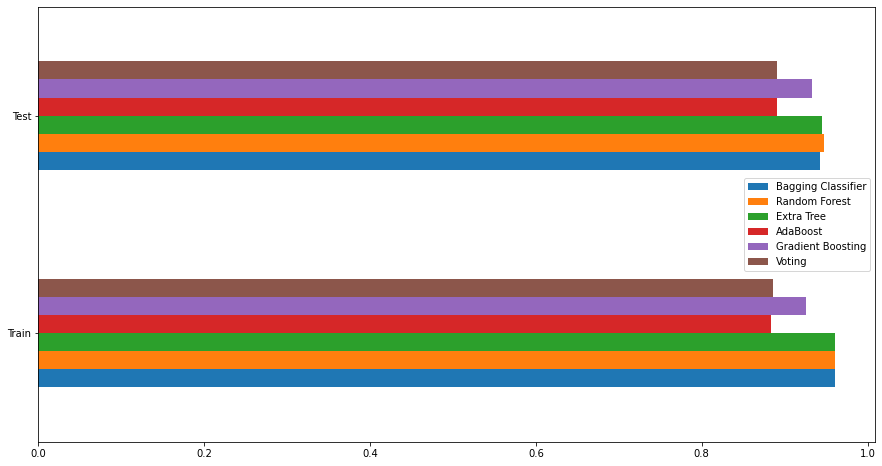

In [34]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))